In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

In [2]:
!wget "https://courses.openedu.ru/assets/courseware/v1/6198dc195c9dd9b03fab679d4f0d2f6a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/saint-petersbourg-1936035_1280.jpg"

--2023-09-23 17:34:25--  https://courses.openedu.ru/assets/courseware/v1/6198dc195c9dd9b03fab679d4f0d2f6a/asset-v1:ITMOUniversity+IMAGPROC+fall_2023_ITMO_bac+type@asset+block/saint-petersbourg-1936035_1280.jpg
Resolving courses.openedu.ru (courses.openedu.ru)... 178.248.235.109
Connecting to courses.openedu.ru (courses.openedu.ru)|178.248.235.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208290 (203K) [image/jpeg]
Saving to: ‘saint-petersbourg-1936035_1280.jpg’

saint-petersbourg-1 100%[===================>] 203.41K   477KB/s    in 0.4s    

2023-09-23 17:34:26 (477 KB/s) - ‘saint-petersbourg-1936035_1280.jpg’ saved [208290/208290]



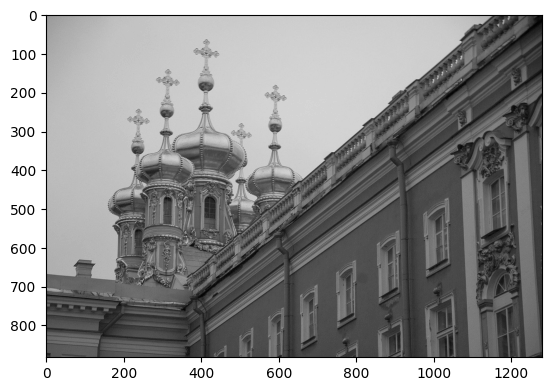

In [21]:
img_name = "saint-petersbourg-1936035_1280.jpg"

img = cv2.imread(img_name)
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray');

In [22]:
wavelet = 'haar'
c = pywt.dwt2(image, wavelet)
cA, (cH, cV, cD) = c

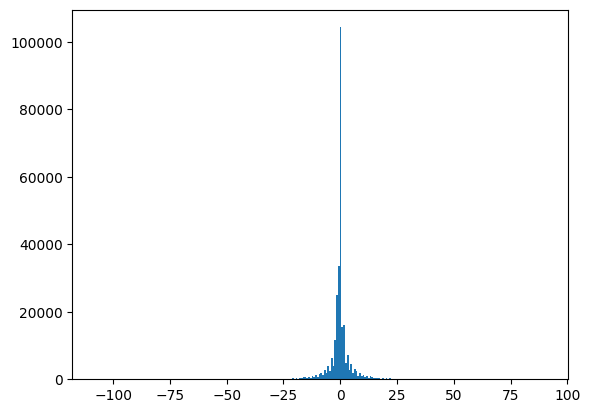

In [23]:
values, bin_edges, _ = plt.hist(cD.ravel(), bins=256);

In [24]:
h_max = np.max(values)
print("max h(n): ", h_max)

max h(n):  104371.0


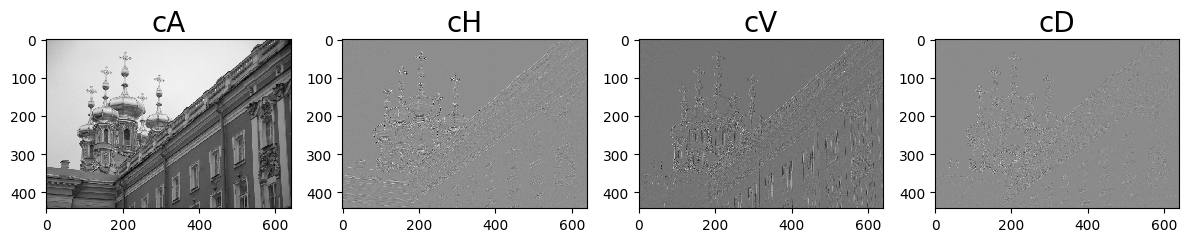

In [25]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap="gray")
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()

In [26]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)

In [31]:
threshold = 110
cA1[np.abs(cA1) < threshold] = 0

In [32]:
cA1[cA1 == 0].shape

(772,)

In [ ]:
|